<a href="https://colab.research.google.com/github/EltonGS/Bootcamp-Data-Science-Alura/blob/main/Modulo3/aulas_modulo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.ticker as ticker

# Aula 1 - Entendendo a série temporal

In [ ]:
url_dados = 'https://github.com/alura-cursos/Prophet_covid/blob/main/dados_covid_sp.zip?raw=true'

dados = pd.read_csv(url_dados, sep=';', compression='zip')

In [ ]:
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt


In [ ]:
# definindo os parâmetros para as figuras a ser plotadas
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15, 8)

In [ ]:
import seaborn as sns

Text(0, 0.5, 'Número de casos')

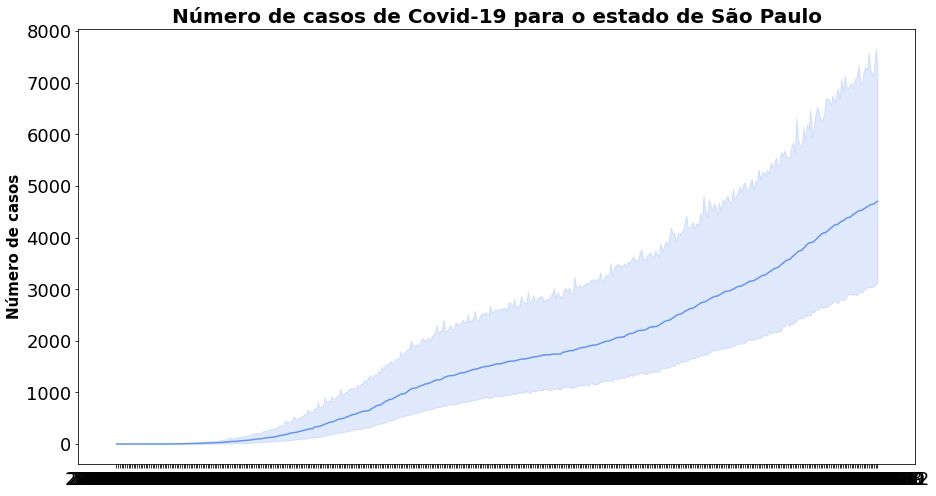

In [ ]:
sns.lineplot(x='datahora', y='casos', data=dados, color='cornflowerblue')
plt.title('Número de casos de Covid-19 para o estado de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')

In [ ]:
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [ ]:
# alterando a coluna datahora para datetime utilidando o pd.to_datetime

dados['datahora'] = pd.to_datetime(dados['datahora'], format='%Y-%m-%d')

(array([737485., 737546., 737607., 737669., 737730., 737791., 737850.,
        737911.]), <a list of 8 Text major ticklabel objects>)

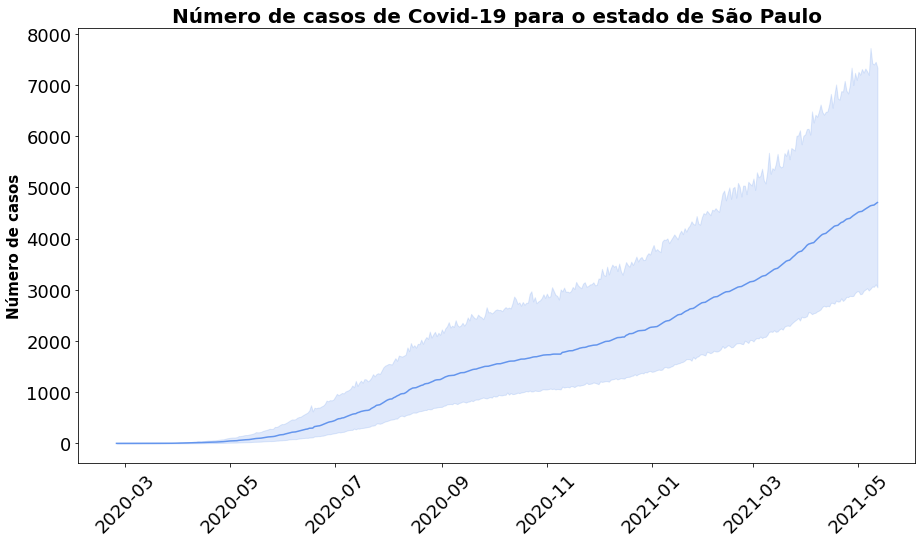

In [ ]:
sns.lineplot(x='datahora', y='casos', data=dados, color='cornflowerblue')
plt.title('Número de casos de Covid-19 para o estado de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.xticks(rotation = 45)

### No gráfico acima temos os casos para cada município do estado de SP, isso causa a demora em plotar o gráfico. A linha azul forte representa a média do número de casos e o intervalo azul claro representa o máximo/minímo número de casos nos municípios.

### Podemos ver no gráfico que o crescimento do número de casos ao longo do tempo aparenta ser exponencial (os casos aumentam em função de uma multiplicação). Para comparar com uma curva de crescimento exponencial padrão vamos importar o numpy para criar essa curva.

$$ e^x$$ 

In [ ]:
import numpy as np

In [ ]:
eixo_x = np.linspace(-2,2,100)

In [ ]:
y_exp = np.exp(eixo_x)

Text(0, 0.5, '')

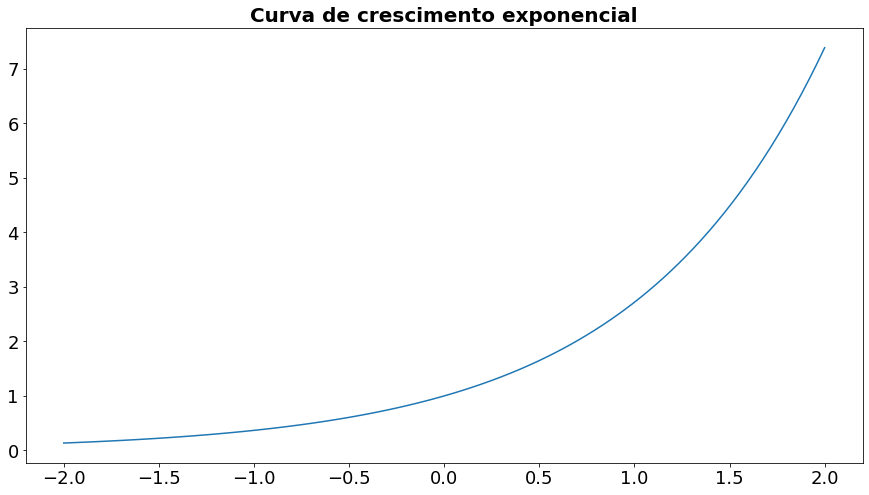

In [ ]:
sns.lineplot(x = eixo_x, y = y_exp)
plt.title('Curva de crescimento exponencial', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('', fontsize=15, fontweight='bold')

$$ log_2 2 = 1 $$
$$ log_2 2^x = x $$
$$ log_e e^x = x $$

## O Logaritmo de 2 na base 2 é igual 1.
## O Logaritmo de 2 elevado a x na base 2 é igual a x.
## O Logarito de **e** elevado a **x** na base **e** é igual a **x**.

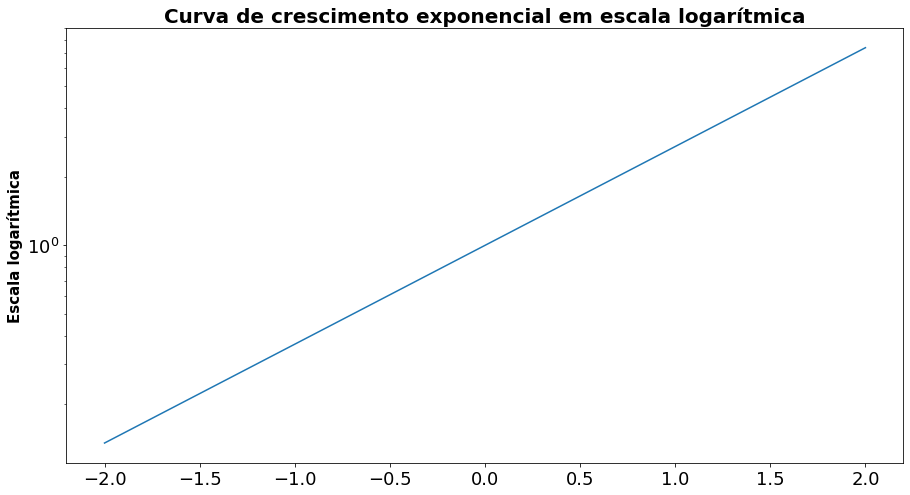

In [ ]:
# ao aplicar o logaritmo na escala do eixo y o resultado é uma linha reta, o valor do eixo x será o mesmo valor no eixo y
sns.lineplot(x = eixo_x, y = y_exp)
plt.title('Curva de crescimento exponencial em escala logarítmica', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Escala logarítmica', fontsize=15, fontweight='bold')
mpl.pyplot.yscale('log')

## Ao aplicar o logaritmo na escala do eixo y em uma curva de crescimento exponencial temos uma reta.

## Podemos testar os dados que temos dessa maneira para determinar se temos uma taxa de crescimento exponencial. Mas faremos isso somente com os dados da cidade de SP. 

In [ ]:
dados_sp = dados.query("nome_munic == 'São Paulo'")

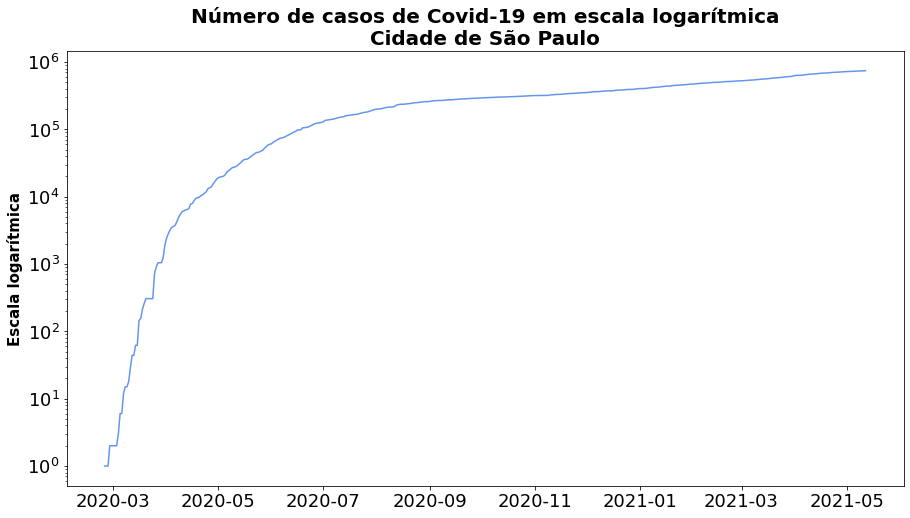

In [ ]:
sns.lineplot(data = dados_sp, x='datahora', y='casos', color='cornflowerblue')
plt.title('Número de casos de Covid-19 em escala logarítmica\nCidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Escala logarítmica', fontsize=15, fontweight='bold')
mpl.pyplot.yscale('log')

## No gráfico acima não temos uma reta perfeita como no nosso exemplo, mas podemos ver alguns segmentos de reta em certos períodos. Isso indica ainda um crescimento exponencial mas que teve seu fator exponencial alterado ao longo do tempo.

In [ ]:
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


(array([737485., 737546., 737607., 737669., 737730., 737791., 737850.,
        737911.]), <a list of 8 Text major ticklabel objects>)

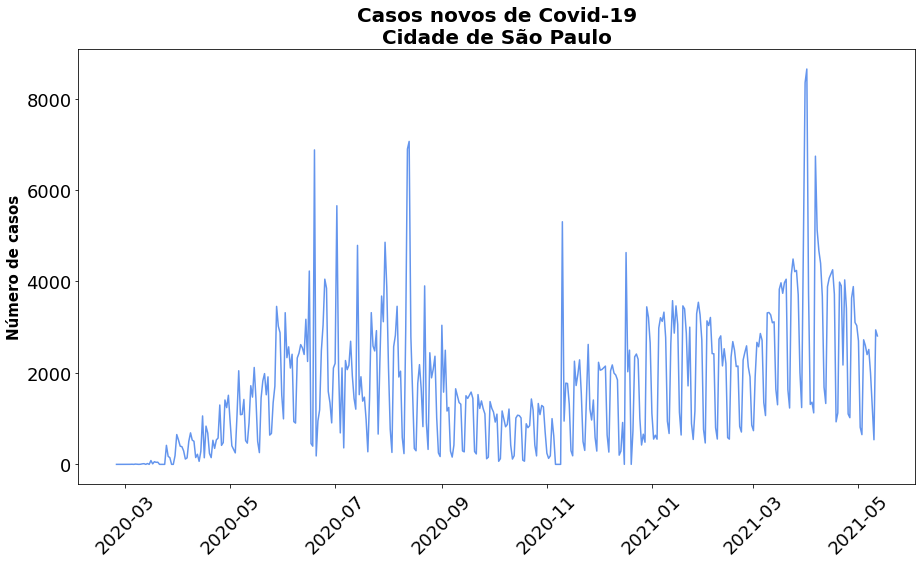

In [ ]:
sns.lineplot(data=dados_sp, x='datahora', y='casos_novos', color='cornflowerblue')
plt.title('Casos novos de Covid-19\nCidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.xticks(rotation = 45)

In [ ]:
dados_exemplo = pd.DataFrame(data=np.linspace(1,10,10))

In [ ]:
dados_exemplo.head()

,0
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


### Criamos agora uma coluna com dados diferenciados em função da nossa coluna original. Dados diferenciado é criado pegando o valor e subtraindo pelo valor anterior. No nosso exemplo temos uma progressão linear de 1 a 10. O primeiro valor será um NaN pois ele não tem um valor anterior para subtrair, depois será 2-1, 3-2, 4-3... etc. Gerando sempre o valor 1.

In [ ]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()
dados_exemplo.head()

,0,diferenciado
0,1.0,NaN
1,2.0,1.0
2,3.0,1.0
3,4.0,1.0
4,5.0,1.0


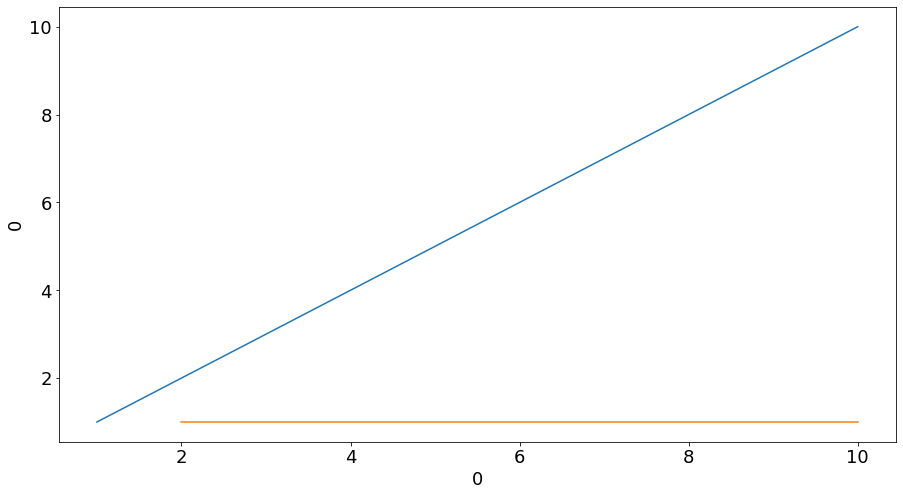

In [ ]:
sns.lineplot(data=dados_exemplo, x=0, y=0)
sns.lineplot(data=dados_exemplo, x=0, y = 'diferenciado')

### Aqui temos uma reta sempre igual pois o valor da diferença é sempre o mesmo. No nosso exemplo o valor da diferença é sempre 1.

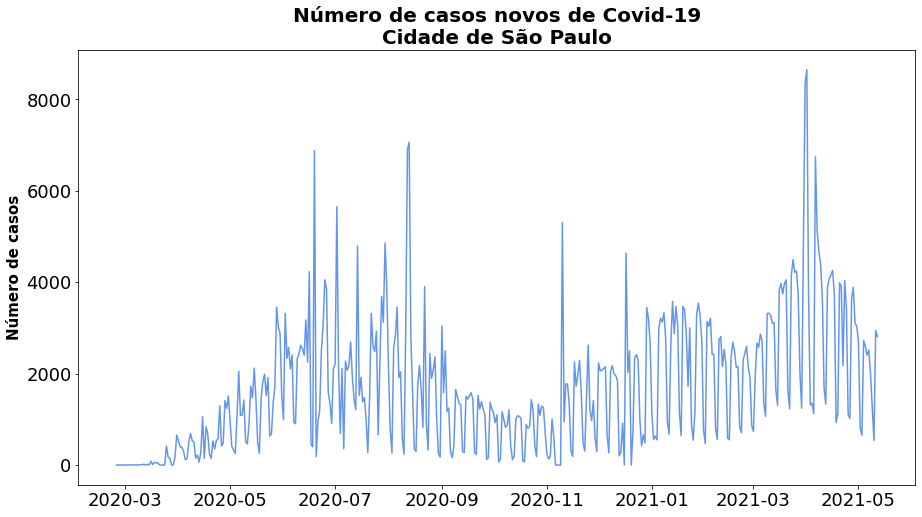

In [ ]:
sns.lineplot(data=dados_sp, x='datahora', y='casos_novos', color='cornflowerblue')
plt.title('Número de casos novos de Covid-19\nCidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.show()

### Com o nosso exemplo acima, e sabendo que o crescimento do número de casos não é linear, não devemos ter uma linha reta quando verificarmos a diferenciação.

In [ ]:
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

In [ ]:
dados_sp.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,NaN,NaN
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,1.0,0.0
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,-1.0,0.0


(array([737485., 737546., 737607., 737669., 737730., 737791., 737850.,
        737911.]), <a list of 8 Text major ticklabel objects>)

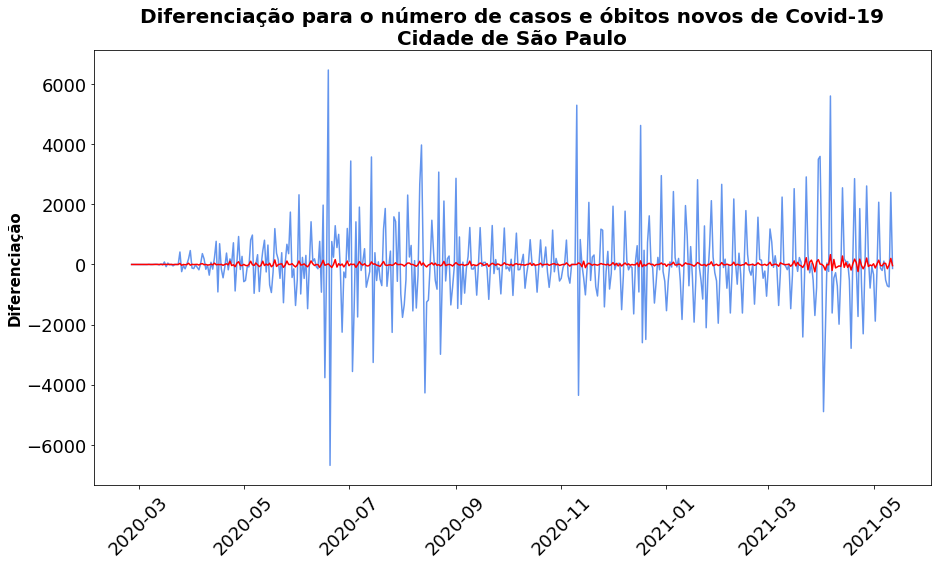

In [ ]:
sns.lineplot(data=dados_sp, x='datahora', y='taxa_de_crescimento_casos', color='cornflowerblue')
sns.lineplot(data=dados_sp, x='datahora', y='taxa_de_crescimento_obitos', color='red')
plt.title('Diferenciação para o número de casos e óbitos novos de Covid-19\nCidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Diferenciação', fontsize=15, fontweight='bold')
plt.xticks(rotation = 45)

### No gráfico acima vemos que a diferenciação para o número de casos varia bastante a partir do 0. Com picos tanto para valores acima ou abaixo de 0. Isso indica picos de casos novos sendo informados em alguns dias, o que causa um pico negativo em seguida pois o número de casos informado é um valor menor que no dia anterior.

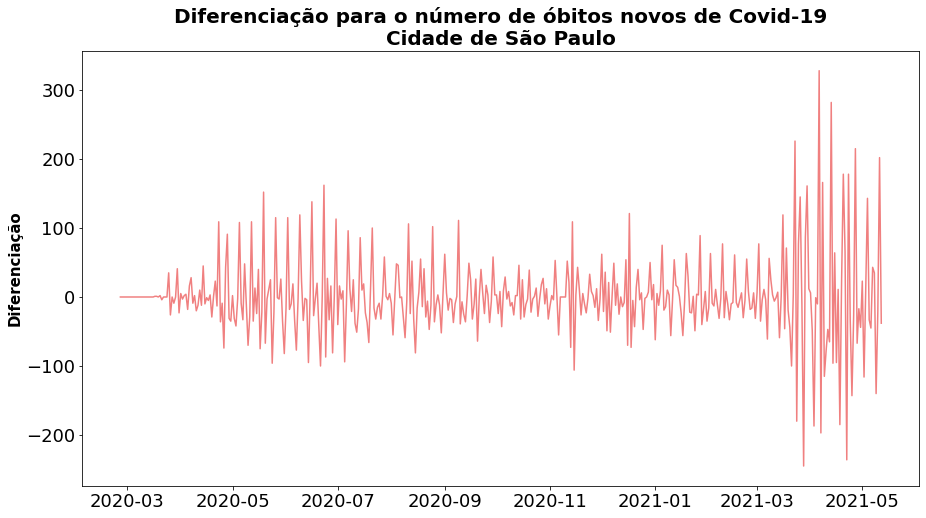

In [ ]:
sns.lineplot(data=dados_sp, x='datahora', y='taxa_de_crescimento_obitos', color='lightcoral')
plt.title('Diferenciação para o número de óbitos novos de Covid-19\nCidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Diferenciação', fontsize=15, fontweight='bold')
plt.show()

### Nesse gráfico do número de óbitos novos temos uma escala no eixo y menor do que de casos novos.

In [ ]:
import matplotlib.pyplot as plt

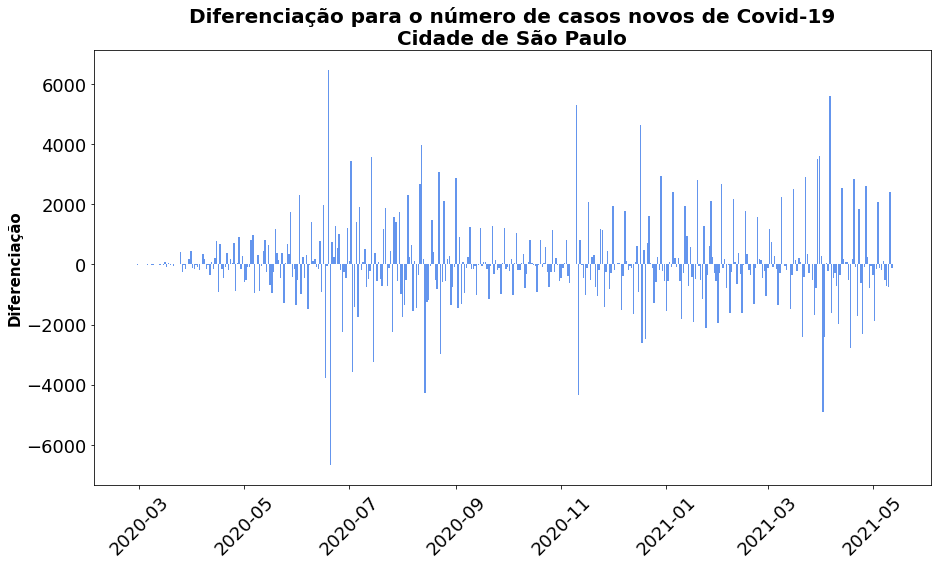

In [ ]:
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'], color='cornflowerblue')
plt.title('Diferenciação para o número de casos novos de Covid-19\nCidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Diferenciação', fontsize=15, fontweight='bold')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# criando uma coluna nova para identificar o ano dos dados do dataframe / lembrando que no inicio indicamos que os 4 primeiros caracteres são o ano (%Y)
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year

In [ ]:
dados_sp['ano']

562       2020
1207      2020
1852      2020
2497      2020
3142      2020
          ... 
283072    2021
283717    2021
284362    2021
285007    2021
285652    2021
Name: ano, Length: 443, dtype: int64

In [ ]:
dados_2021 = dados_sp.query("ano == 2021")

In [ ]:
dados_2021.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos,ano
201157,São Paulo,3550308,1,1,2021-01-01,402835,1117,"3,393821e+03","1714,4285714",15695,16,"1,322279e+02","35,1428571","0,0389613614",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",53,-1540.0,-62.0,2021
201802,São Paulo,3550308,2,1,2021-01-02,403388,553,"3,398480e+03","1733,0000000",15716,21,"1,324048e+02","37,1428571","0,0389600087",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",53,-564.0,5.0,2021
202447,São Paulo,3550308,3,1,2021-01-03,404025,637,"3,403846e+03","1729,7142857",15725,9,"1,324806e+02","37,4285714","0,0389208589",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,84.0,-12.0,2021
203092,São Paulo,3550308,4,1,2021-01-04,404576,551,"3,408489e+03","1739,2857143",15743,18,"1,326323e+02","38,0000000","0,0389123428",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,-86.0,9.0,2021
203737,São Paulo,3550308,5,1,2021-01-05,407557,2981,"3,433603e+03","1673,0000000",15836,93,"1,334158e+02","42,1428571","0,0388559146",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,2430.0,75.0,2021


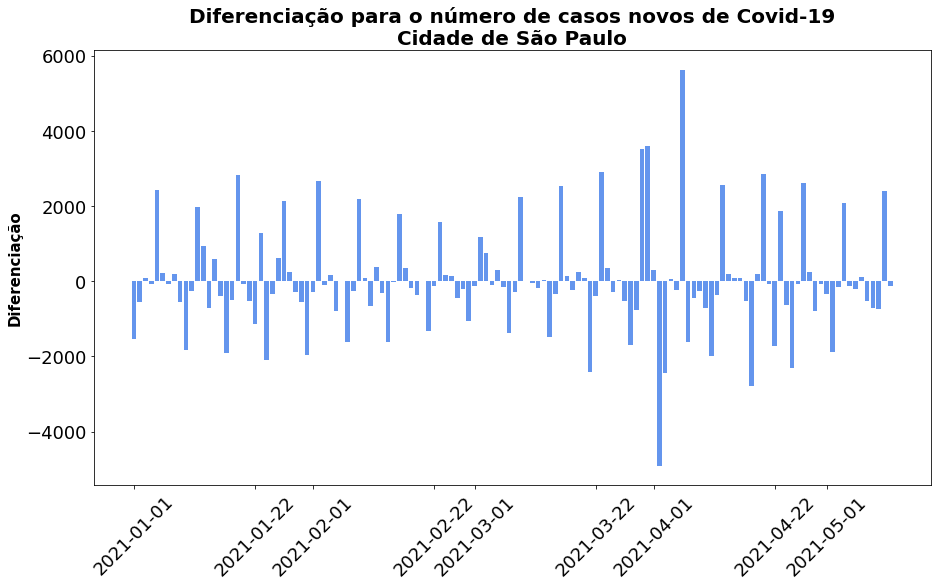

In [ ]:
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'], color='cornflowerblue')
plt.title('Diferenciação para o número de casos novos de Covid-19\nCidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Diferenciação', fontsize=15, fontweight='bold')
plt.xticks(rotation = 45)
plt.show()

### No gráfico acima podemos extrair muitas informações como picos de casos informados, uma queda brusca no valor de casos informados, dias seguidos com valores altos de casos novos.

### No gráfico de linha para o número de casos novos podemos extrair uma média móvel para uma determinada janela. A função rolling() criará uma janela dentro dos dados e seguirá "rolando" através de todo o dataframe. Após isso podemos calcular a média dentro dessa janela. Isso será feito logo abaixo.

In [ ]:
# para extrair a média móvel dos dados será criada uma nova coluna com base na coluna casos_novos
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window = 7, center = False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window = 7, center = False).mean()

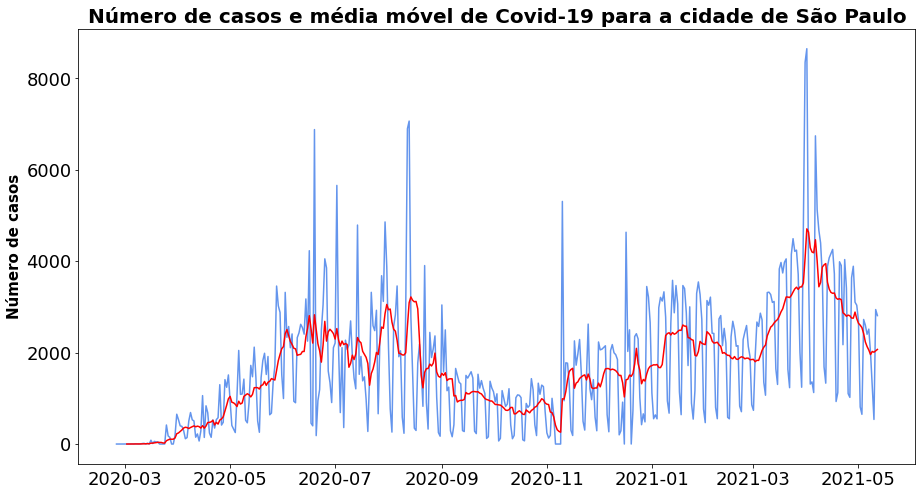

In [ ]:
sns.lineplot(data=dados_sp, x='datahora', y='casos_novos', color='cornflowerblue')
sns.lineplot(data=dados_sp, x='datahora', y='media_movel_casos', color='red')
plt.title('Número de casos e média móvel de Covid-19 para a cidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.show()

### Para verificar se uma série temporal está relacionado com outra série temporal. Podemos plotar um gráfico dessas séries temporais.

### No exemplo abaixo plotamos um gráfico dos casos_novos pelos casos_novos. Nesse exemplo temos uma correlação perfeita, pois os dados são iguais.

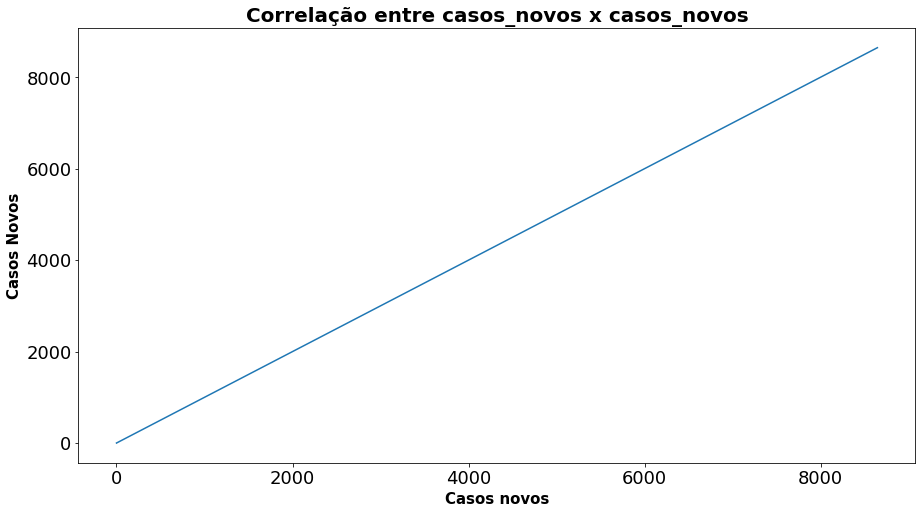

In [ ]:
sns.lineplot(x='casos_novos', y = 'casos_novos', data=dados_sp)
plt.title('Correlação entre casos_novos x casos_novos', fontsize = 20, fontweight = 'bold')
plt.xlabel('Casos novos', fontsize=15, fontweight='bold')
plt.ylabel('Casos Novos', fontsize=15, fontweight='bold')
plt.show()

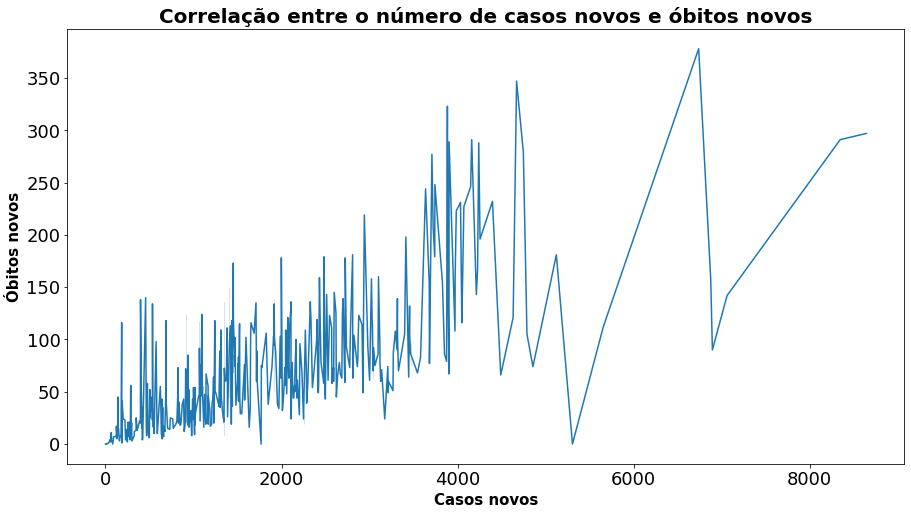

In [ ]:
sns.lineplot(data=dados_sp, x='casos_novos', y='obitos_novos')
plt.title('Correlação entre o número de casos novos e óbitos novos', fontsize = 20, fontweight = 'bold')
plt.xlabel('Casos novos', fontsize=15, fontweight='bold')
plt.ylabel('Óbitos novos', fontsize=15, fontweight='bold')
plt.show()

In [ ]:
# selecionando os dados do mês 1 do ano 2021
dados_202101 = dados_sp.query("mes == 1 and ano == 2021")

# selecionando os dados do mês 2 do ano 2021
dados_202102 = dados_sp.query("mes == 2 and ano == 2021")

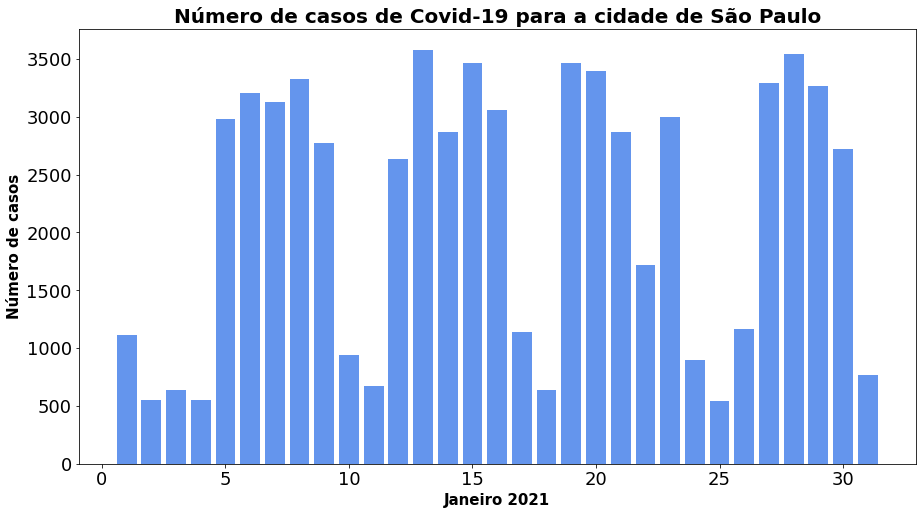

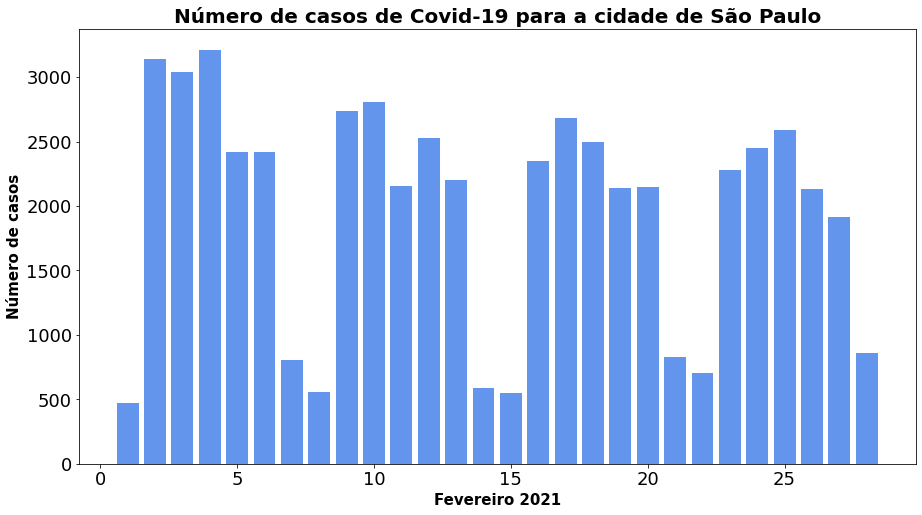

In [ ]:
plt.bar(np.linspace(1, 31, 31), dados_202101['casos_novos'], color='cornflowerblue')
plt.title('Número de casos de Covid-19 para a cidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('Janeiro 2021', fontsize=15, fontweight='bold')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.show()

plt.bar(np.linspace(1, 28, 28), dados_202102['casos_novos'], color='cornflowerblue')
plt.title('Número de casos de Covid-19 para a cidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('Fevereiro 2021', fontsize=15, fontweight='bold')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.show()

### Nos gráficos acima podemos identificar que geralmente temos 5 dias com alta no número de casos novos e 2 dias com uma baixa. Isso é a **SAZONALIDADE**.

### Para identificar uma sazonalidade em um conjunto de dados devemos aplicar uma função de correlação aos dados. Podemos fazer isso com o próprio Pandas.

In [ ]:
from pandas.plotting import autocorrelation_plot

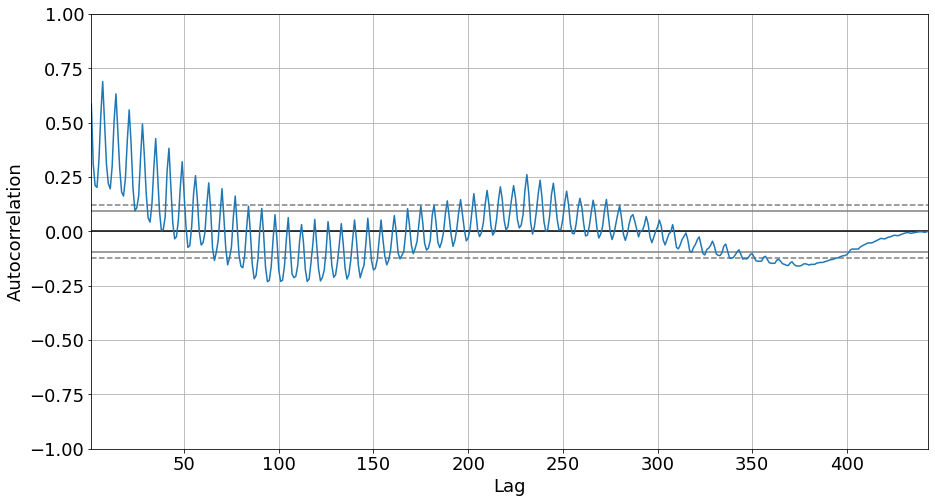

In [ ]:
autocorrelation_plot(dados_sp['casos_novos'])

### A autocorrelação é utilizada para identificar se existe uma relação dos dados com o tempo, se há alguma relação entre os dados com o passar do tempo. No gráfico acima podemos ver picos com valores altos próximos a 1. Isso indica uma dependência dos dados em relação ao tempo. E a direita do gráfico temos a linha se aproximando de zero, mostrando que os dados do momento atual da pandemia não tem uma correlação com o que acontecia no início da pandemia.

### No gráfico abaixo geramos uma série com valores aleatórios e aplicamos ele na função de autocorrelação. Vemos que o gráfico fica sempre muito próximo de zero, mostrando que não há uma relação entre os dados e o passar do tempo.

In [ ]:
dados_sp.shape

(443, 31)

In [ ]:
aleatorio = np.random.rand(443)

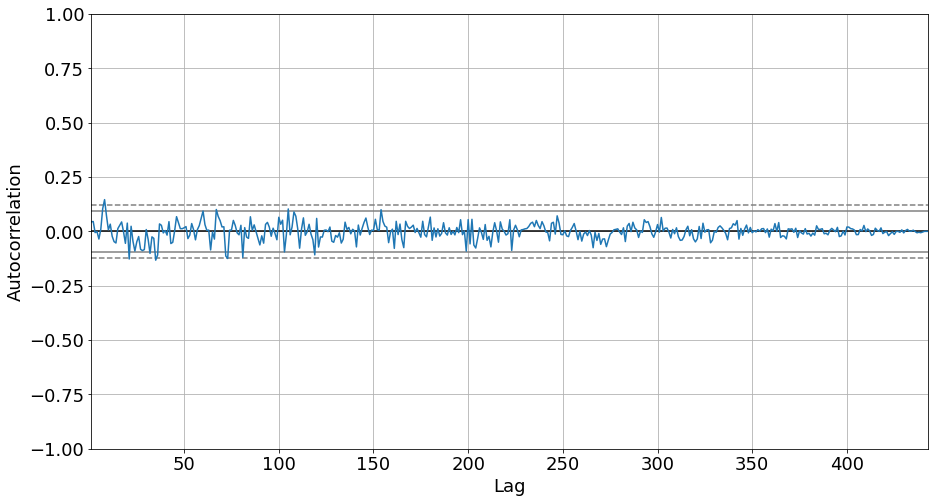

In [ ]:
autocorrelation_plot(aleatorio)

# Desafio 01: Um notebook sem warnings



In [ ]:
# para remover os warning importamos a biblioteca warnings e definimos para que os avisos sejam ignorados
import warnings
warnings.filterwarnings('ignore')

# Desafio 02: Pico taxa de casos novos coincide com taxa dos óbitos novos.



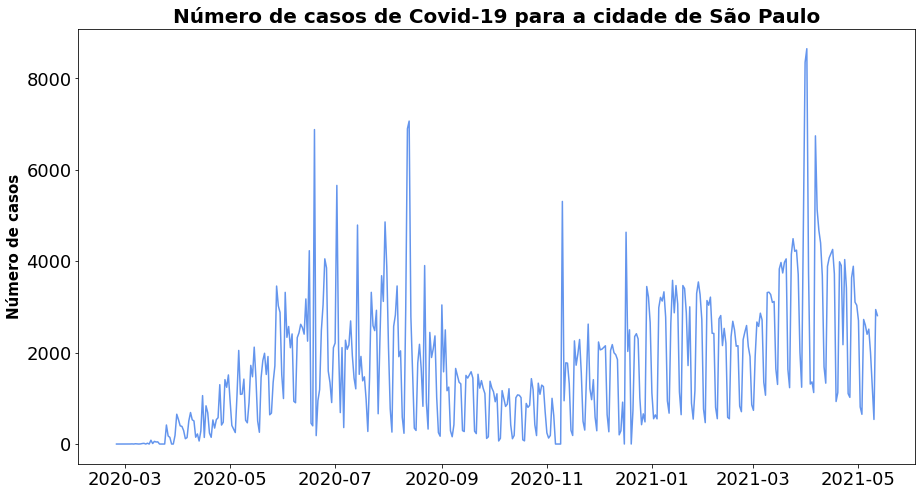

Text(0, 0.5, 'Número de óbitos')

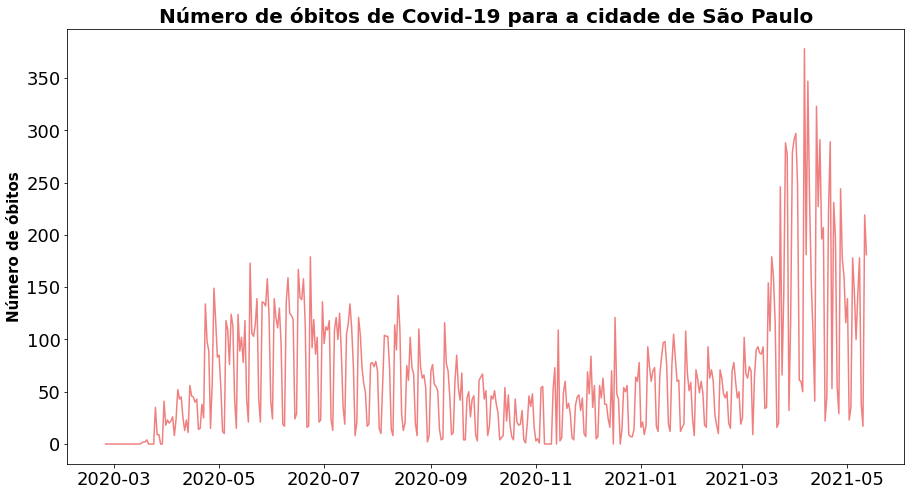

In [ ]:
# verificando os picos de casos novos
sns.lineplot(data = dados_sp, x='datahora', y = 'casos_novos', color='cornflowerblue')
plt.title('Número de casos de Covid-19 para a cidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.show()
# verificando os picos de óbitos novos
sns.lineplot(data = dados_sp, x='datahora', y = 'obitos_novos', color='lightcoral')
plt.title('Número de óbitos de Covid-19 para a cidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Número de óbitos', fontsize=15, fontweight='bold')


In [ ]:
# entre os meses de junho (6) e agosto (8) pode-se ver alguns picos no número de casos, selecionando esse dados para comparar com os óbitos
dados_sp_0608 = dados_sp.query("mes == 6 or mes == 7 or mes == 8")

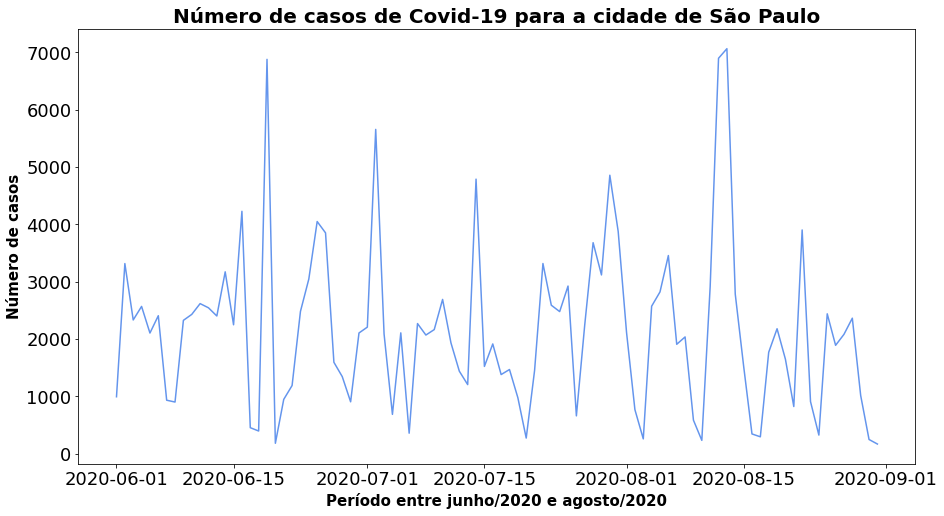

Text(0, 0.5, 'Número de óbitos')

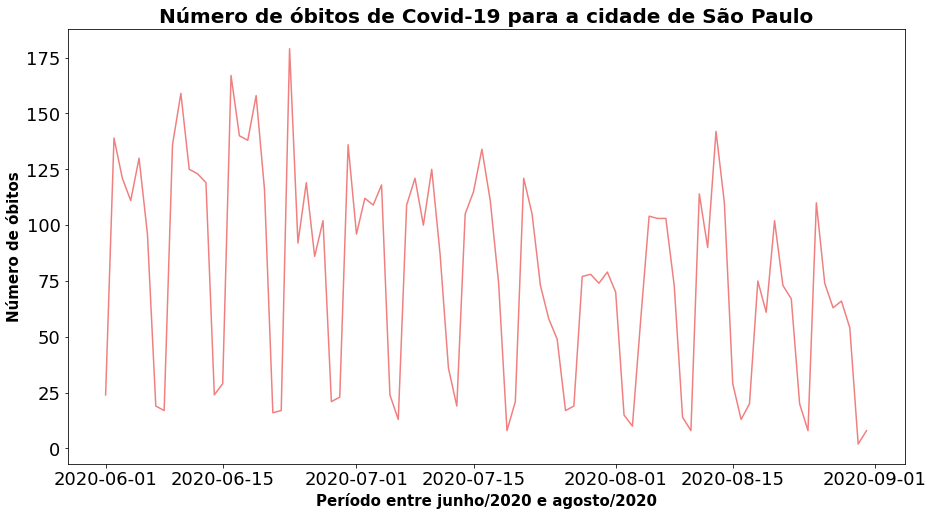

In [ ]:
# plotando os gráficos para comparar esse período entre casos e óbitos
sns.lineplot(data = dados_sp_0608, x='datahora', y = 'casos_novos', color='cornflowerblue')
plt.title('Número de casos de Covid-19 para a cidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('Período entre junho/2020 e agosto/2020', fontsize=15, fontweight='bold')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.show()
# verificando os picos de óbitos novos nesse período
sns.lineplot(data = dados_sp_0608, x='datahora', y = 'obitos_novos', color = 'lightcoral')
plt.title('Número de óbitos de Covid-19 para a cidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('Período entre junho/2020 e agosto/2020', fontsize=15, fontweight='bold')
plt.ylabel('Número de óbitos', fontsize=15, fontweight='bold')

### Podemos identificar nos gráficos quando há um aumento no número de novos casos o número de óbitos também aumenta, mas não podemos ver no gráfico um crescimento tão agressivo nos óbitos como o pico no número de casos leva a crer que aconteceria.

# Desafio 03: Fazer melhorias nos gráficos.



In [ ]:
# feito durante o curso

# Desafio 04: Gerar o gráfico da média móvel do número de óbitos e mudar os gráficos de casos para barras.



Text(0, 0.5, 'Número de óbitos')

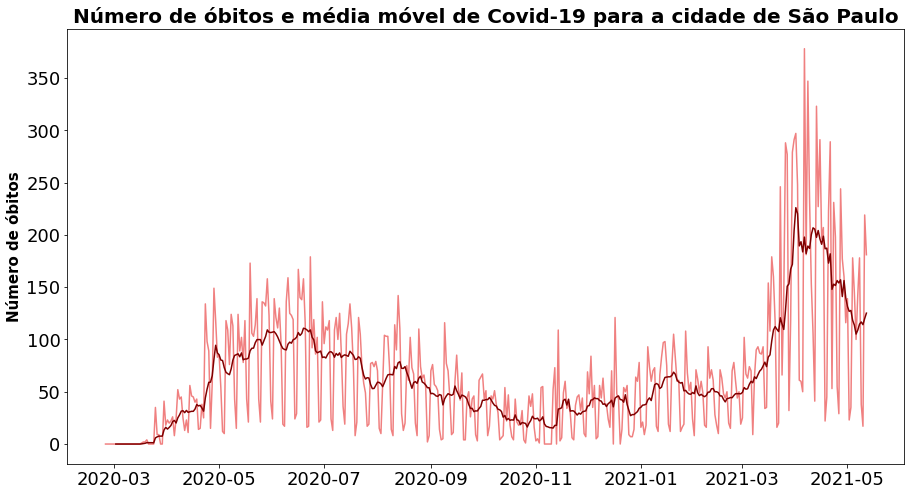

In [ ]:
# a coluna de média movel para óbitos já foi criada durante a aula
# dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window = 7, center = False).mean()
sns.lineplot(data=dados_sp, x='datahora', y = 'obitos_novos', color='lightcoral')
sns.lineplot(data=dados_sp, x = 'datahora', y = 'media_movel_obitos', color='maroon')
plt.title('Número de óbitos e média móvel de Covid-19 para a cidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de óbitos', fontsize=15, fontweight='bold')

Text(0, 0.5, 'Número de casos')

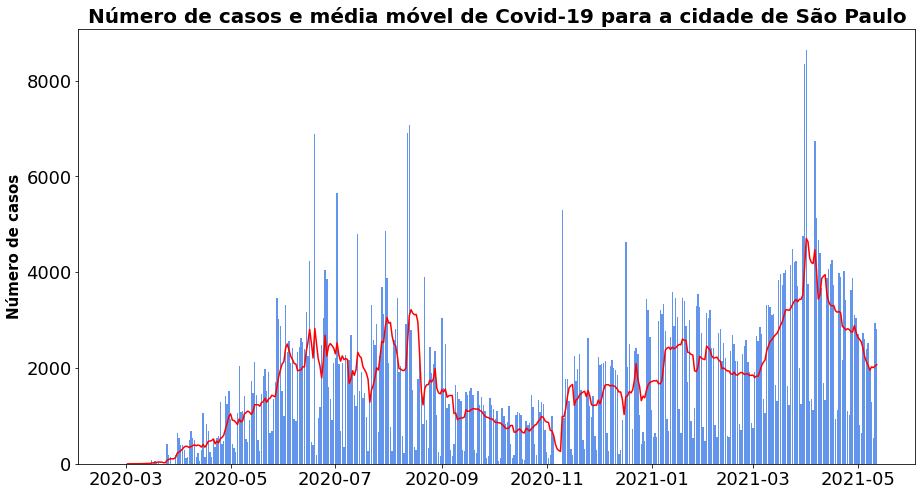

In [ ]:
# alterando os gráficos de casos para um gráficos de barras
plt.bar(dados_sp['datahora'], dados_sp['casos_novos'], color='cornflowerblue')
sns.lineplot(data = dados_sp, x='datahora', y='media_movel_casos', color='red')
plt.title('Número de casos e média móvel de Covid-19 para a cidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')

# Desafio 05: Mover o número de óbitos alguns dias para verificar o resultado no gráfico.



# Desafio 06: Função de correlação cruzada dos óbitos e casos.



In [ ]:
# conforme mencionado na aula, a biblioteca statsmodels possui uma função para realizar a correlação cruzada
# a função utilizada é statsmodels.tsa.stattools.ccf(x,y,adjusted=True)

# importando a biblioteca da statsmodels para utilizar a função ccf()
import statsmodels.tsa.stattools as smt


corr_cruz = smt.ccf(dados_sp['obitos_novos'], dados_sp['casos_novos'])

In [ ]:
corr_cruz

array([ 7.35532357e-01,  4.85072503e-01,  2.80024518e-01,  1.93298762e-01,
        2.33715789e-01,  2.89375228e-01,  5.10927127e-01,  6.83954963e-01,
        4.81527805e-01,  2.74696547e-01,  2.07099602e-01,  2.07993524e-01,
        2.81040364e-01,  5.01699143e-01,  6.49033104e-01,  4.32868693e-01,
        2.24694855e-01,  1.71060852e-01,  1.74626497e-01,  2.44880307e-01,
        4.37415981e-01,  5.63513307e-01,  3.55297227e-01,  1.84999366e-01,
        1.15822121e-01,  1.08504337e-01,  1.75354627e-01,  3.61530017e-01,
        4.99694829e-01,  2.81037917e-01,  1.05533864e-01,  5.97074703e-02,
        6.14157061e-02,  1.04881211e-01,  2.97322149e-01,  4.15741342e-01,
        2.07864103e-01,  6.35557584e-02, -5.70133491e-03, -1.84895936e-02,
        5.30711460e-02,  2.52687611e-01,  3.50220255e-01,  1.43957133e-01,
       -1.79813366e-02, -4.71171805e-02, -4.70251739e-02,  1.60452671e-02,
        1.82817308e-01,  3.02309870e-01,  1.08717572e-01, -4.83610369e-02,
       -8.51749199e-02, -

(array([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,
         -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,
         -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,
         -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,
         -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,
         -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,  -37,  -36,  -35,
         -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,
         -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,
         -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,
          -1,    0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
          10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
          21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
          32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,
          43,   44,   45,   46,   47, 

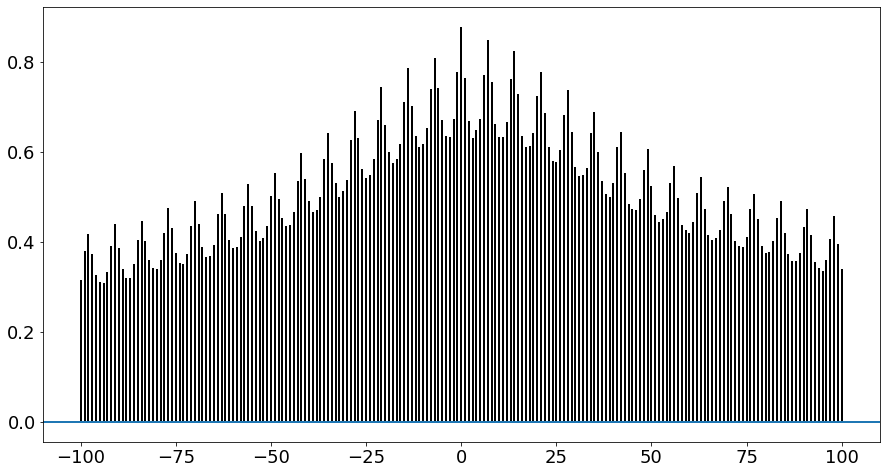

In [ ]:
# pode ser utizada a função xcorr() do matplotlib para verificar a correlação cruzada
import numpy as np

# copiando o dataset para utilizar a função já que se os 2 dados são de tipo int um erro é gerado ao utilizar a função
dados_teste = dados_sp

# alterando o tipo dos dados para float
dados_teste['obitos_novos'] = dados_teste['obitos_novos'].astype('float')
dados_teste['casos_novos'] = dados_teste['casos_novos'].astype('float')

# plotando o gráfico usando a função de correlação cruzada / usevlines=True plota um gráfico de barra, False plota um scatterplot
# maxlags define o número de lags que deseja gerar / lw=2 define o peso da linha a ser gerada
plt.xcorr(dados_teste['obitos_novos'], dados_teste['casos_novos'], usevlines=True, maxlags=100, lw=2)

# Desafio 07: Estudar outros municípios.



In [ ]:
# o munícipio selecionado é Santo André, onde resido
# definindo o dataset com os dados de Santo André
dados_sa = dados.query("nome_munic == 'Santo André'")
dados_sa.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
534,Santo André,3547809,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,693867,123293,17578,0,8.0,"-23,6737","-46,5432",9
1179,Santo André,3547809,26,2,2020-02-26,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,693867,123293,17578,0,8.0,"-23,6737","-46,5432",9
1824,Santo André,3547809,27,2,2020-02-27,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,693867,123293,17578,0,8.0,"-23,6737","-46,5432",9
2469,Santo André,3547809,28,2,2020-02-28,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,693867,123293,17578,0,8.0,"-23,6737","-46,5432",9
3114,Santo André,3547809,29,2,2020-02-29,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,693867,123293,17578,0,8.0,"-23,6737","-46,5432",9


Text(0, 0.5, 'Número de casos')

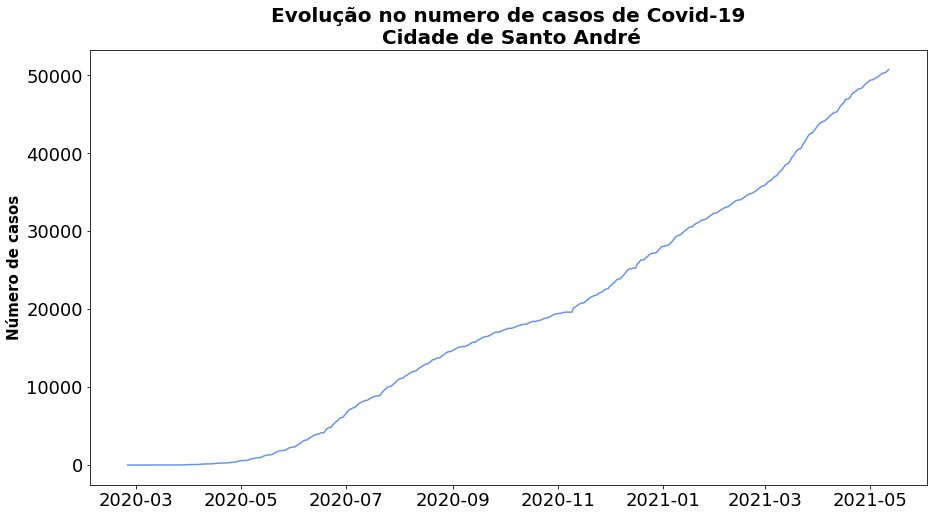

In [ ]:
# aumento do número de casos ao longo do tempo
sns.lineplot(data=dados_sa, x='datahora', y='casos', color='cornflowerblue')
plt.title('Evolução no numero de casos de Covid-19\n Cidade de Santo André', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')

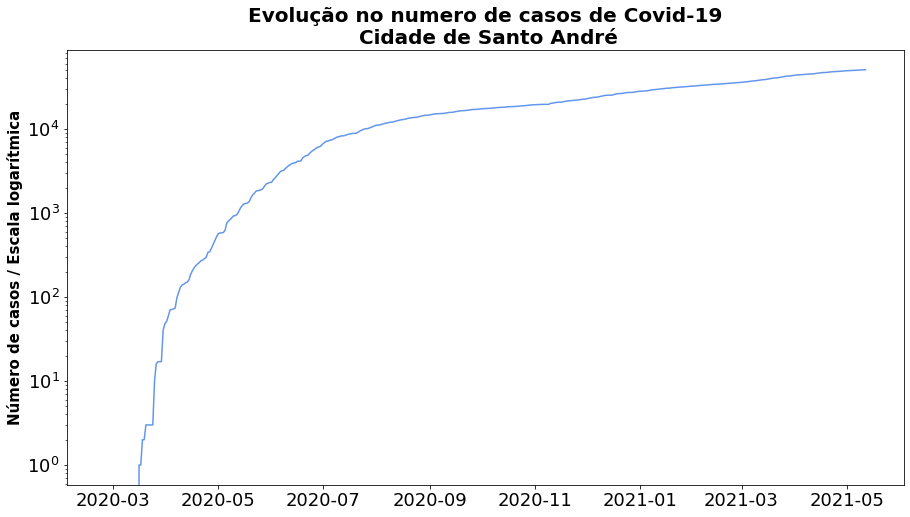

In [ ]:
# evolução do número de casos em base logarítmica
sns.lineplot(data=dados_sa, x='datahora', y='casos', color='cornflowerblue')
plt.title('Evolução no numero de casos de Covid-19\n Cidade de Santo André', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de casos / Escala logarítmica', fontsize=15, fontweight='bold')
plt.yscale('log')

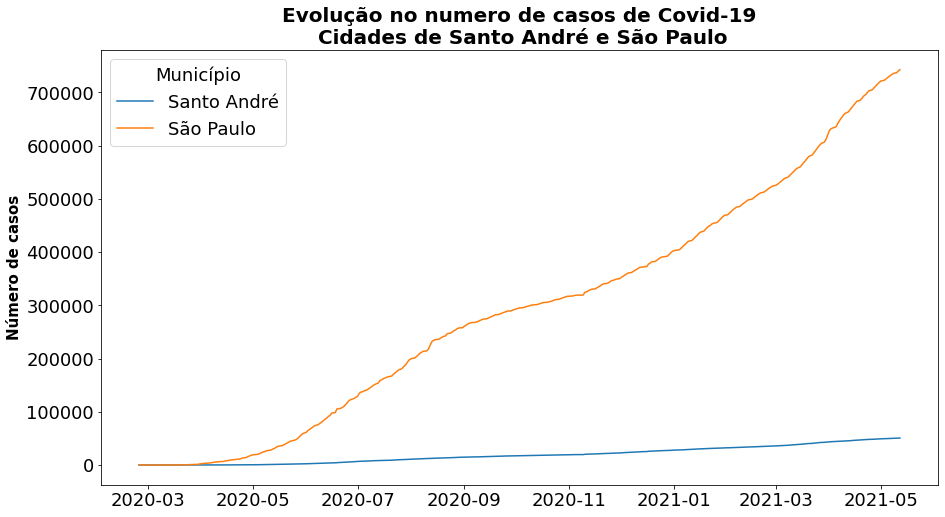

In [ ]:
# comparando com a cidade de SP

# criando uma series com os 2 municipios
dados_combinados = dados.query("nome_munic == 'Santo André' or nome_munic == 'São Paulo'")

sns.lineplot(data=dados_combinados, x='datahora', y='casos', hue='nome_munic')
plt.title('Evolução no numero de casos de Covid-19\n Cidades de Santo André e São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.legend(title='Município')

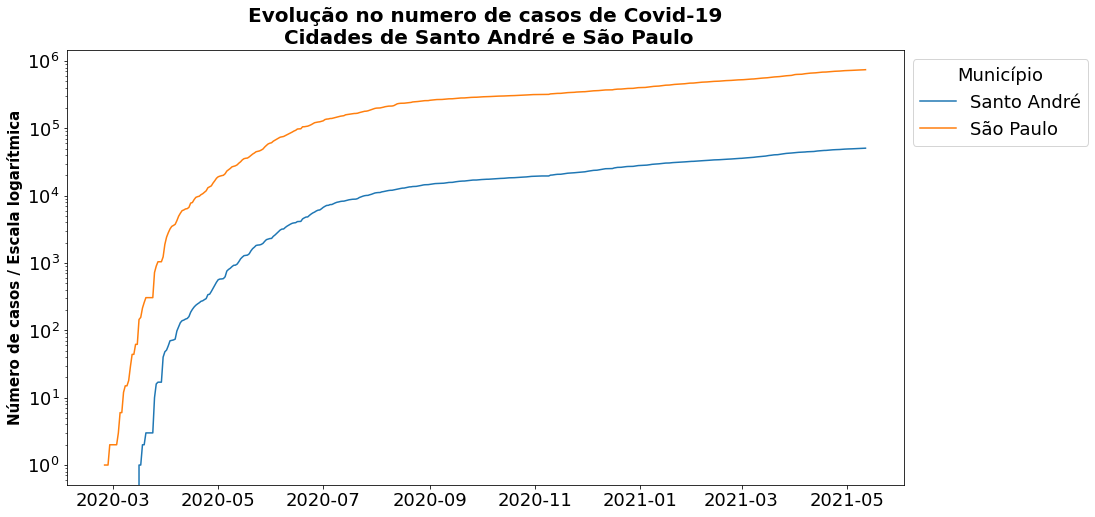

In [ ]:
# comparando com a cidade de São Paulo com escala logarítmica
sns.lineplot(data=dados_combinados, x='datahora', y='casos', hue='nome_munic')

plt.title('Evolução no numero de casos de Covid-19\n Cidades de Santo André e São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de casos / Escala logarítmica', fontsize=15, fontweight='bold')
plt.yscale('log')
plt.legend(title='Município', bbox_to_anchor=(1,1))

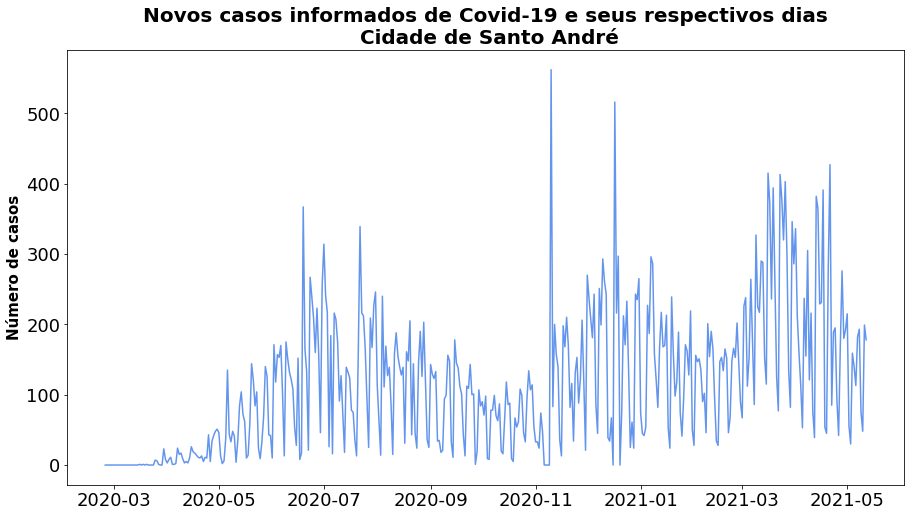

Text(0, 0.5, 'Número de casos')

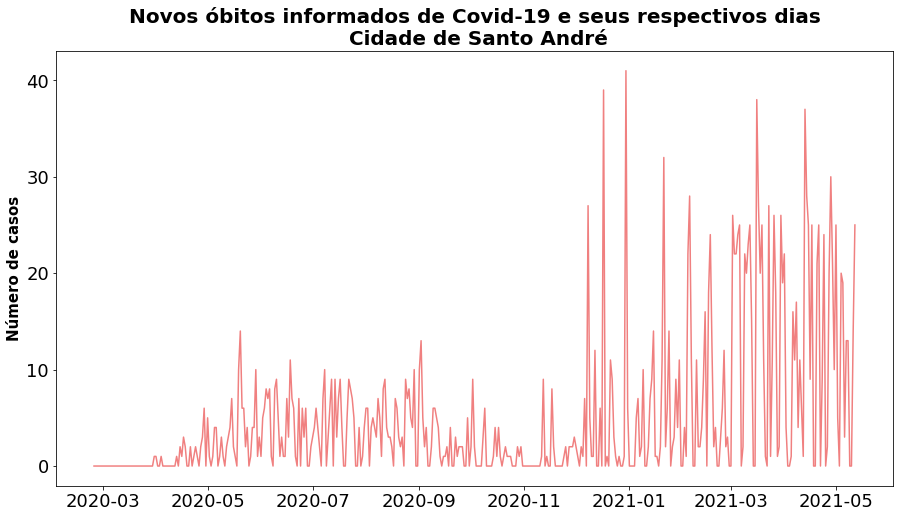

In [ ]:
# numero de casos e óbitos novos para santo andre
sns.lineplot(data=dados_sa, x='datahora', y='casos_novos', color='cornflowerblue')
plt.title('Novos casos informados de Covid-19 e seus respectivos dias\n Cidade de Santo André', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.show()

sns.lineplot(data=dados_sa, x='datahora', y='obitos_novos', color='lightcoral')
plt.title('Novos óbitos informados de Covid-19 e seus respectivos dias\n Cidade de Santo André', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de óbitos', fontsize=15, fontweight='bold')

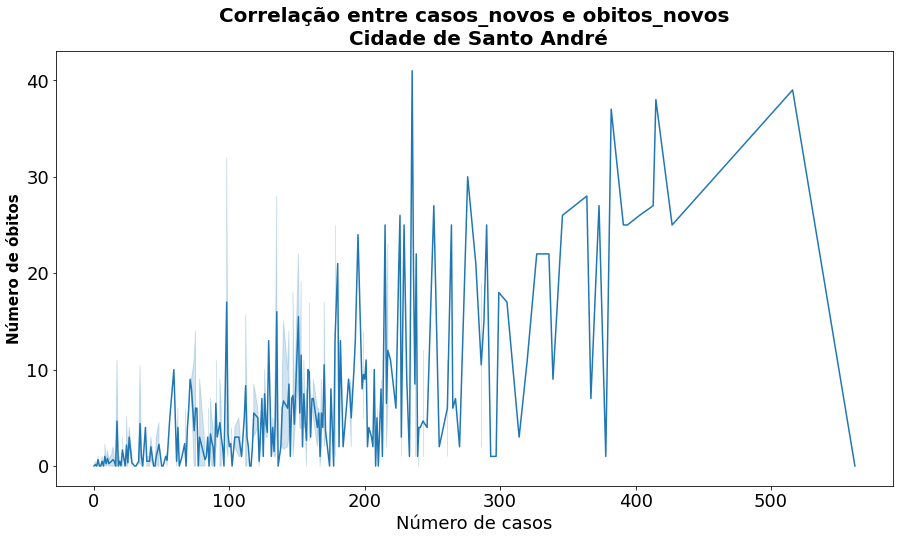

In [ ]:
# correlação entre o numero de casos novos e óbitos novos para santo andré
sns.lineplot(data=dados_sa, x='casos_novos', y='obitos_novos')
plt.title('Correlação entre casos_novos e obitos_novos\n Cidade de Santo André', fontsize = 20, fontweight = 'bold')
plt.xlabel('Número de casos')
plt.ylabel('Número de óbitos', fontsize=15, fontweight='bold')
plt.show()

In [ ]:
# calculando a média móvel de casos e óbitos para santo andré
dados_sa['media_movel_casos'] = dados_sa['casos_novos'].rolling(window=7, center=False).mean()
dados_sa['media_movel_obitos'] = dados_sa['obitos_novos'].rolling(window=7,center=False).mean()

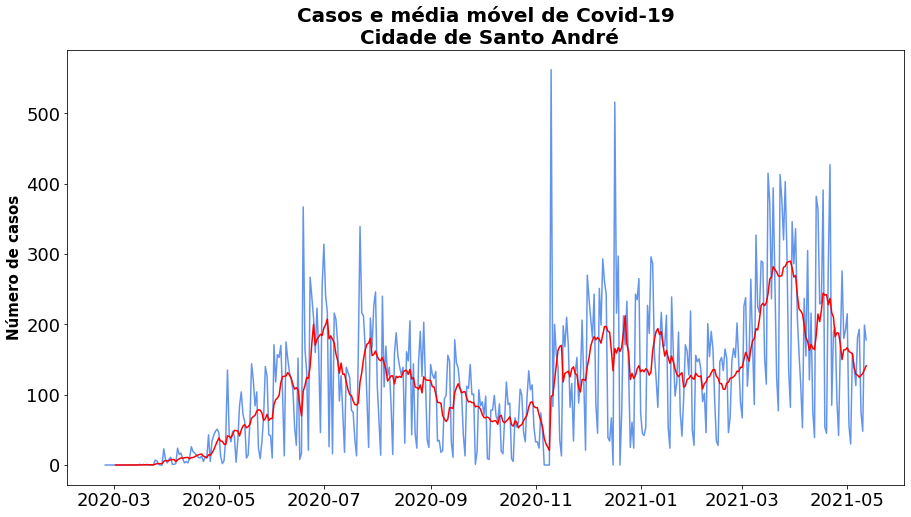

Text(0, 0.5, 'Número de óbitos')

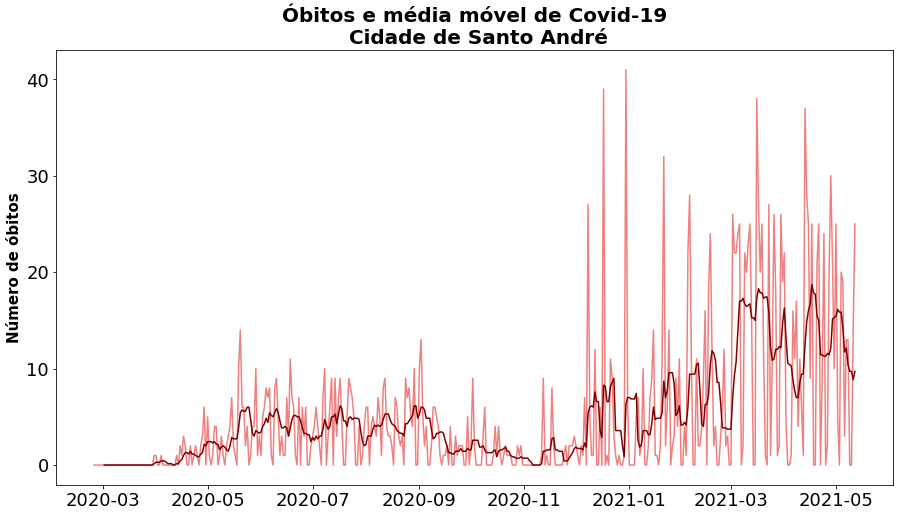

In [ ]:
# plotando gráfico comparando o número de casos e óbitos com suas médias movéis
sns.lineplot(data=dados_sa, x='datahora', y='casos_novos', color='cornflowerblue')
sns.lineplot(data=dados_sa, x='datahora', y='media_movel_casos', color='red')
plt.title('Casos e média móvel de Covid-19\n Cidade de Santo André', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.show()

sns.lineplot(data=dados_sa, x='datahora', y='obitos_novos', color='lightcoral')
sns.lineplot(data=dados_sa, x='datahora', y='media_movel_obitos', color='maroon')
plt.title('Óbitos e média móvel de Covid-19\n Cidade de Santo André', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de óbitos', fontsize=15, fontweight='bold')

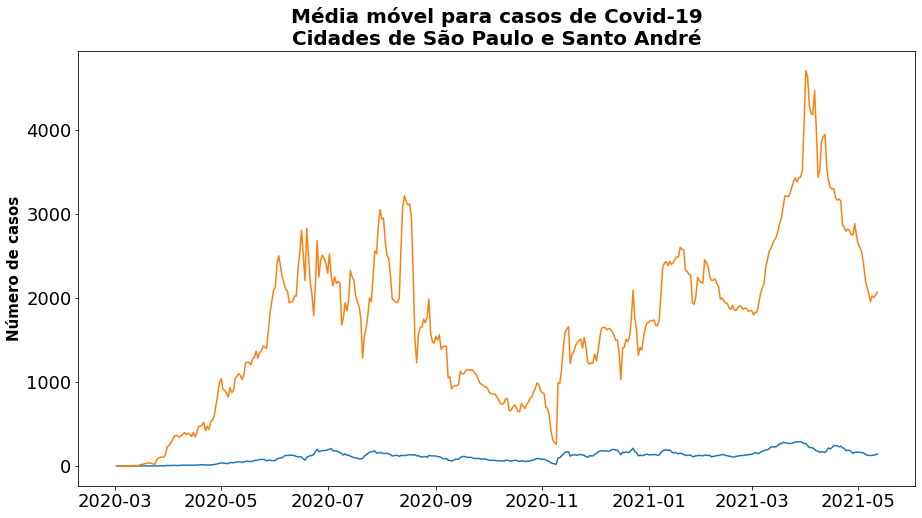

Text(0, 0.5, 'Número de óbitos')

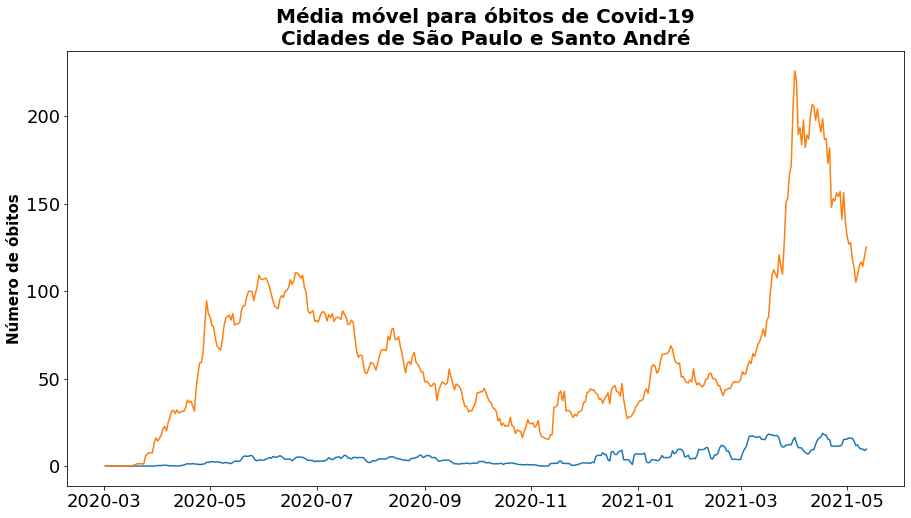

In [ ]:
# comparação entre a média móvel de casos e óbitos de santo andré e são paulo
sns.lineplot(data=dados_sa, x='datahora', y='media_movel_casos')
sns.lineplot(data=dados_sp, x='datahora', y='media_movel_casos')

plt.title('Média móvel para casos de Covid-19\nCidades de São Paulo e Santo André', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.show()

sns.lineplot(data=dados_sa, x='datahora', y='media_movel_obitos')
sns.lineplot(data=dados_sp, x='datahora', y='media_movel_obitos')

plt.title('Média móvel para óbitos de Covid-19\nCidades de São Paulo e Santo André', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de óbitos', fontsize=15, fontweight='bold')
